# Exploring, Modeling, and iNterpreting the Data

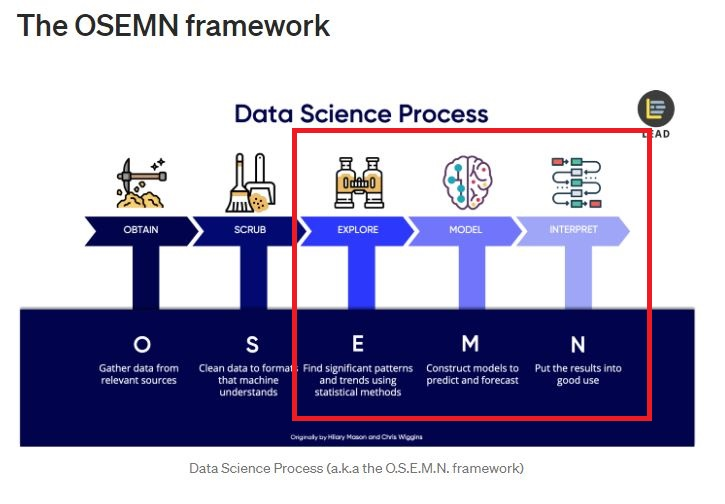

## Import the data/libraries

### Libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

### Import the .csv file as a new dataframe

In [21]:
# Create a new data frame and remove unwanted 'Unnamed: 0' column which popped up during the import of .csv file
# df_churndata_modded.columns[0]

df_churndata_modded = pd.read_csv('TelcoCustomerChurn[MODIFIED].csv')
df_churndata_modded.drop('Unnamed: 0', axis=1, inplace=True)
df_churndata_modded.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,Yes,0.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,Yes,1.0,...,1.0,0.0,0.0,0.0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,Yes,1.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,Yes,1.0,...,1.0,1.0,0.0,0.0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Yes,0.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65,1


### Info about the data. Looks like there are 7043 entries and 3 types of data.

In [22]:
df_churndata_modded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null object
OnlineSecurity      5517 non-null float64
OnlineBackup        5517 non-null float64
DeviceProtection    5517 non-null float64
TechSupport         5517 non-null float64
StreamingTV         5517 non-null float64
StreamingMovies     5517 non-null float64
Contract            7043 non-null object
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(7), int64(9), obje

## Features

#### Initial view the the dataframe shows there are some columns that we can get rid of. Specifically:
        -   'customerID'   - because each customer ID is unique

In [23]:
len(df_churndata_modded['customerID'].unique())

7043

In [24]:
df_churndata_modded.drop('customerID', axis=1, inplace=True)
df_churndata_modded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,Yes,0.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,Yes,1.0,0.0,1.0,0.0,0.0,0.0,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,0,Yes,1.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,Yes,1.0,0.0,1.0,1.0,0.0,0.0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Yes,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65,1


In [25]:
#This only did the columns with numbers
# Change all the yes no columns to binary
# Change 3 categorical values using pandas - GETDUMMIES
#     -No need with OHE
# df_churndata_modded.hist(bins=20)
# Changing categorical values to 1s and 0s.
# Scale tenure, monthly charges, totalcharges
#Merge the dataframes into new dataframe










In [26]:
#Create a function that takes the column Yes/No/etc and gives me a percentage of each
df_churndata_modded_percent_split = df_churndata_modded[['Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]
# df_churndata_modded_percent_split.head()
df_churndata_modded_percent_split.head()
list_percent_split = list(df_churndata_modded_percent_split.columns)





In [27]:
df_churndata_modded.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [28]:
df_churndata_modded

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,Yes,0.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,Yes,1.0,0.0,1.0,0.0,0.0,0.0,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,0,Yes,1.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,Yes,1.0,0.0,1.0,1.0,0.0,0.0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Yes,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,Yes,1.0,0.0,1.0,1.0,1.0,1.0,One year,1,Mailed check,84.80,1990.5,0
7039,0,0,1,1,72,1,1,Yes,0.0,1.0,1.0,0.0,1.0,1.0,One year,1,Credit card (automatic),103.20,7362.9,0
7040,0,0,1,1,11,0,0,Yes,1.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,1,Yes,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,74.40,306.6,1


In [29]:
temp_df_1 = pd.DataFrame(df_churndata_modded, columns = ['customerID', 'gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'])
# temp_df_1.head()
# df = pd.DataFrame(data, columns = ['First_Name', 'Last_Name', 'Age'])

my_list = list(temp_df_1)
my_list

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']